In [1]:
import pprint

from ml_dcs.internal.mtsa.data_utils import MTSADataUtil

util = MTSADataUtil(input_dir_path="./tmp/2024-07-04/input")
data = util._parse_data()

for mtsa_result in data:
    print("{}\t{}\t{}\t{}\t{}\t{}\t{}".format(
        mtsa_result.lts, mtsa_result.duration, 
        mtsa_result.significant_duration, 
        mtsa_result.compile_step.total_number_of_states, 
        mtsa_result.compile_step.total_number_of_transitions, 
        mtsa_result.compile_step.total_number_of_controllable_actions,
        mtsa_result.compile_step.total_number_of_uncontrollable_actions
    ))

ArtGallery（N, 5 room）	0:03:00.622000	0:00:35.821000	2016110	12912500	11496235	1416265
AT（4, 4）	0:00:01.618000	0:00:00.634000	3824	15905	11184	4721
AT（4, 5）	0:00:02.571000	0:00:00.992000	6207	27705	20776	6929
AT（2, 4）	0:00:00.437000	0:00:00.204000	90	237	184	53
ArtGallery（N, 3 room）	0:00:03.307000	0:00:01.074000	14146	61852	52061	9791
BW（3, 4）	0:00:00.667000	0:00:00.292000	736	2939	978	1961
KIVA_system（S, 5 pod）	0:01:00.416000	0:00:23.525000	16162	498559	498559	0
BW（5, 3）	0:00:07.160000	0:00:03.722000	16814	108076	36021	72055
BW（2, 4）	0:00:00.258000	0:00:00.102000	88	235	78	157
CM（2, 4）	0:00:07.851000	0:00:03.365000	45144	131751	62568	69183
CM（2, 2）	0:00:01.065000	0:00:00.439000	3940	10455	5120	5335
KIVA_system（S, 10 pod）	0:02:42.042000	0:00:57.576000	113262	4737939	4737939	0
BW（5, 5）	0:01:02.516000	0:00:36.985000	161058	1098106	366031	732075
CM（2, 3）	0:00:03.264000	0:00:01.485000	15946	45003	21588	23415
BW（4, 4）	0:00:03.867000	0:00:01.822000	6568	35019	11670	23349
ArtGallery（N, 4 room）

In [2]:
import pandas as pd
from ml_dcs.internal.mtsa.data_utils import MTSADataUtil

util = MTSADataUtil(input_dir_path="./tmp/2024-07-04/input")
data = util._parse_data()

l = []
for mtsa_result in data:
    l.append({
        "lts": mtsa_result.lts,
        "duration": mtsa_result.duration_ms,
        "significant_duration": mtsa_result.significant_duration_ms,
    })
l.sort(key=lambda x: x["lts"])
pd.json_normalize(l)

,lts,duration,significant_duration
0,AT,133547.0,64372.0
1,"AT（2, 2）",314.0,127.0
2,"AT（2, 3）",366.0,102.0
3,"AT（2, 4）",437.0,204.0
4,"AT（2, 5）",432.0,137.0
5,"AT（3, 3）",495.0,212.0
6,"AT（3, 4）",638.0,279.0
7,"AT（3, 5）",788.0,287.0
8,"AT（4, 4）",1618.0,634.0
9,"AT（4, 5）",2571.0,992.0


In [3]:
from ml_dcs.internal.mtsa.data_utils import MTSADataUtil
from ml_dcs.domain.ml import MLCalculationTimePredictionInput1

util = MTSADataUtil(input_dir_path="./tmp/2024-07-04/input")
util.get_dataframe(ml_input_class=MLCalculationTimePredictionInput1)


,total_number_of_states,total_number_of_transitions,total_number_of_controllable_actions,total_number_of_uncontrollable_actions,number_of_models,calculation_time
0,2016110,12912500,11496235,1416265,31,180622.0
1,3824,15905,11184,4721,18,1618.0
2,6207,27705,20776,6929,22,2571.0
3,90,237,184,53,10,437.0
4,14146,61852,52061,9791,19,3307.0
5,736,2939,978,1961,3,667.0
6,16162,498559,498559,0,82,60416.0
7,16814,108076,36021,72055,3,7160.0
8,88,235,78,157,3,258.0
9,45144,131751,62568,69183,10,7851.0


{'r2_score': 0.8940304589586959, 'mae': 171700.40721212255}


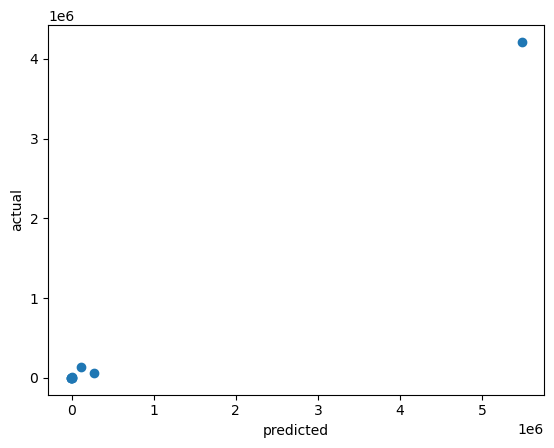

In [4]:
from ml_dcs.internal.ml.prediction_methods import LinearRegressionPrediction
from ml_dcs.internal.mtsa.data_utils import MTSADataUtil
from ml_dcs.domain.ml import MLCalculationTimePredictionInput1

util = MTSADataUtil(input_dir_path="./tmp/2024-07-04/input")
df = util.get_dataframe(ml_input_class=MLCalculationTimePredictionInput1)
prediction = LinearRegressionPrediction(df)
result = prediction.evaluate()
print(result.model_dump())
prediction.plt_show()

{'r2_score': 0.3130804227370264, 'mae': 374465.7744444444}


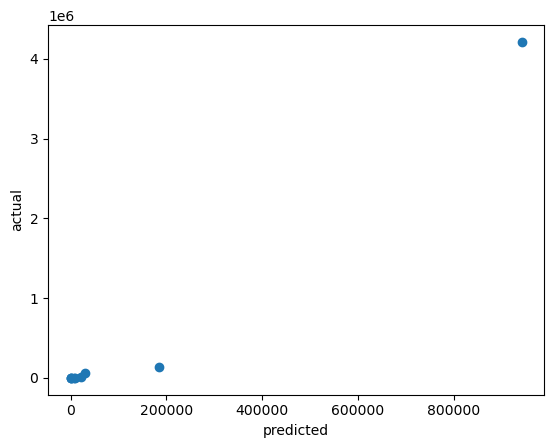

In [5]:
from ml_dcs.internal.ml.prediction_methods import RandomForestPrediction
from ml_dcs.internal.mtsa.data_utils import MTSADataUtil
from ml_dcs.domain.ml import MLCalculationTimePredictionInput1

util = MTSADataUtil(input_dir_path="./tmp/2024-07-04/input")
df = util.get_dataframe(ml_input_class=MLCalculationTimePredictionInput1)
prediction = RandomForestPrediction(df)
result = prediction.evaluate()
print(result.model_dump())
prediction.plt_show()

{'r2_score': 0.5225247155647926, 'mae': 309566.39081806055}


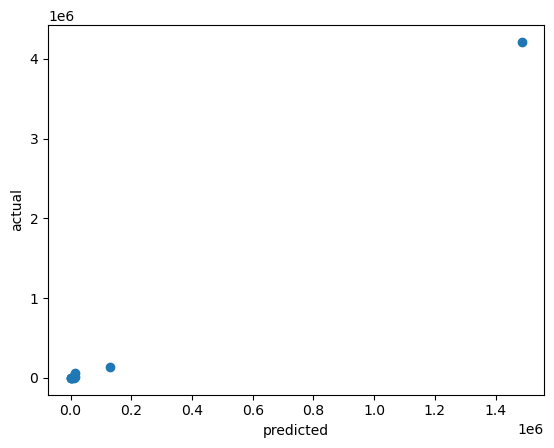

In [6]:
from ml_dcs.internal.ml.prediction_methods import GradientBoostingPrediction
from ml_dcs.internal.mtsa.data_utils import MTSADataUtil
from ml_dcs.domain.ml import MLCalculationTimePredictionInput1

util = MTSADataUtil(input_dir_path="./tmp/2024-07-04/input")
df = util.get_dataframe(ml_input_class=MLCalculationTimePredictionInput1)
prediction = GradientBoostingPrediction(df)
result = prediction.evaluate()
print(result.model_dump())
prediction.plt_show()

In [7]:
from ml_dcs.internal.ml.prediction_methods import LinearRegressionPrediction
from ml_dcs.internal.mtsa.data_utils import MTSADataUtil
from ml_dcs.domain.ml import MLMemoryUsagePredictionInput1

util = MTSADataUtil(input_dir_path="./tmp/2024-07-04/input")
util.get_dataframe(ml_input_class=MLMemoryUsagePredictionInput1)

,total_number_of_states,total_number_of_transitions,total_number_of_controllable_actions,total_number_of_uncontrollable_actions,number_of_models,memory_usage
0,2016110,12912500,11496235,1416265,31,22217794
1,3824,15905,11184,4721,18,38372
2,6207,27705,20776,6929,22,59782
3,90,237,184,53,10,10500
4,14146,61852,52061,9791,19,125615
5,736,2939,978,1961,3,19594
6,16162,498559,498559,0,82,1236604
7,16814,108076,36021,72055,3,426042
8,88,235,78,157,3,11896
9,45144,131751,62568,69183,10,296800


{'r2_score': -5.097833721584609, 'mae': 28979241.74909383}


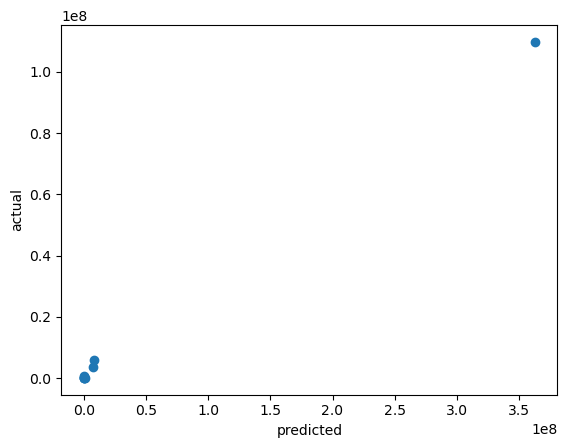

In [8]:
from ml_dcs.internal.ml.prediction_methods import LinearRegressionPrediction
from ml_dcs.internal.mtsa.data_utils import MTSADataUtil
from ml_dcs.domain.ml import MLMemoryUsagePredictionInput1

util = MTSADataUtil(input_dir_path="./tmp/2024-07-04/input")
df = util.get_dataframe(ml_input_class=MLMemoryUsagePredictionInput1)
prediction = LinearRegressionPrediction(df)
result = prediction.evaluate()
print(result.model_dump())
prediction.plt_show()

{'r2_score': 0.3504563811509822, 'mae': 9806312.255555555}


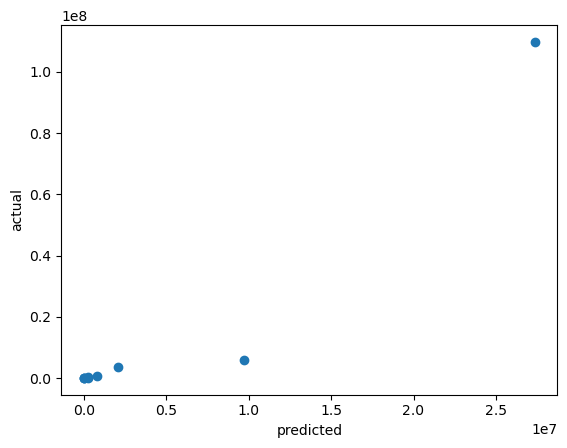

In [9]:
from ml_dcs.internal.ml.prediction_methods import RandomForestPrediction
from ml_dcs.internal.mtsa.data_utils import MTSADataUtil
from ml_dcs.domain.ml import MLMemoryUsagePredictionInput1

util = MTSADataUtil(input_dir_path="./tmp/2024-07-04/input")
df = util.get_dataframe(ml_input_class=MLMemoryUsagePredictionInput1)
prediction = RandomForestPrediction(df)
result = prediction.evaluate()
print(result.model_dump())
prediction.plt_show()

{'r2_score': 0.1951901024572802, 'mae': 10459394.637150688}


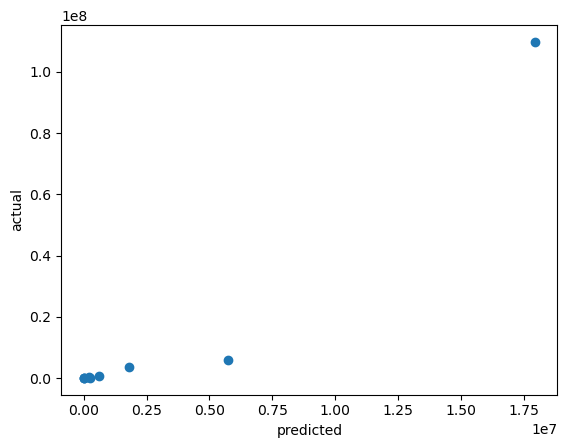

In [10]:
from ml_dcs.internal.ml.prediction_methods import GradientBoostingPrediction
from ml_dcs.internal.mtsa.data_utils import MTSADataUtil
from ml_dcs.domain.ml import MLMemoryUsagePredictionInput1

util = MTSADataUtil(input_dir_path="./tmp/2024-07-04/input")
df = util.get_dataframe(ml_input_class=MLMemoryUsagePredictionInput1)
prediction = GradientBoostingPrediction(df)
result = prediction.evaluate()
print(result.model_dump())
prediction.plt_show()